In [3]:
import os
import xarray as xr
import sys 
from cartopy.io.img_tiles import OSM
import matplotlib.pyplot as plt
from lair.air import inventories
from lair.utils.geo import PC, bbox2extent


In [2]:
# SLV CH4 Point Sources

from shapely.geometry import Point

from lair.utils.geo import PC


locations = {  # Satellite imagery center point
    'landfill': {
        'Salt Lake':    Point(-112.043, 40.746),
        'Trans-Jordan': Point(-112.055, 40.558),
        'Bountiful':    Point(-111.917, 40.911)},
    'refinery': {  # EPA 2011 ICR mean location by facility name
        'Chevron':        Point(-111.924, 40.825),
        'Big West Oil':   Point(-111.920, 40.838),
        'Marathon':       Point(-111.909, 40.794),
        'Holly Refining': Point(-111.904, 40.887),
        'Silver Eagle':   Point(-111.910, 40.868)},
    'wastewater': {
        'Magna Water & Sewer District':            Point(-112.074, 40.728),
        'Central Valley Water Reclamation':        Point(-111.900, 40.682),
        'Jordan Basin Water Reclamation Facility': Point(-111.919, 40.504),
        'SLC Water Reclamation Facility':          Point(-111.931, 40.813),
        'So. Valley Water Reclamation':            Point(-111.924, 40.615),
        'South Davis Sewer District-South Plant':  Point(-111.942, 40.842),
        'South Davis Sewer District-North Plant':  Point(-111.933, 40.903),
        'Central Davis Co Sewer':                  Point(-111.945, 41.001)}
}

markers = {
    'landfill': 's',
    'refinery': '^',
    'wastewater': 'o'
}

def plot_point_sources(kind, ax):
    for source, point in locations[kind].items():
        ax.scatter(point.x, point.y, transform=PC,
                   label=source, c='black',
                   marker=markers[kind])

    return ax

In [3]:
# Load inventories
ch4_inventories = {
    'EDGARv8':   inventories.EDGARv8('CH4'),
    'EPAv1':     inventories.EPAv1(),
    'EPAv2':     inventories.EPAv2(),
    'GFEIv2':    inventories.GFEIv2(),
    'WetCHARTs': inventories.WetCHARTs(),
}

In [4]:
SLV_bounds = (-112.1, 40.5,
              -111.8, 41.0)

# Clip to SLV bounds and get extent
clip_bounds = (SLV_bounds[0] - 0.1, SLV_bounds[1] - 0.1,
               SLV_bounds[2] + 0.1, SLV_bounds[3] + 0.1)
ch4_inventories = {name: inventory.clip(clip_bounds)
                   for name, inventory in ch4_inventories.items()}
extent = bbox2extent(SLV_bounds)

In [5]:
# Determine vmax for colorbar
vmax = float(max(inventory.total_emissions.max()
                 for inventory in ch4_inventories.values()))

In [8]:
# Get background tiles
tiler = OSM()
tiler_zoom = 9

In [9]:
# Figure options
cmap = 'Reds'
alpha = 0.75

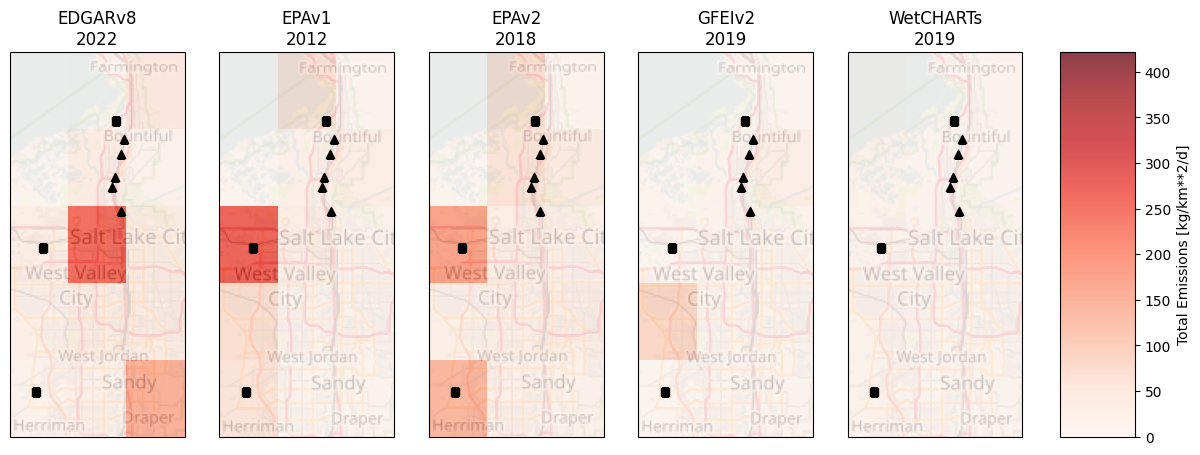

In [10]:
# Plot
fig, axes = plt.subplots(ncols=len(ch4_inventories), sharey=True,
                         figsize=(15, 5),
                         subplot_kw={'projection': tiler.crs})

i = 1
for ax, (name, inventory) in zip(axes.flatten(), ch4_inventories.items()):
    ax.set_extent(extent, crs=PC)
    ax.add_image(tiler, tiler_zoom)

    # Add colorbar
    if i == len(ch4_inventories):
        add_colorbar = True
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.825, axes[0].get_position().y0,
                                0.05, axes[0].get_position().height])
    else:
        add_colorbar = False
        cbar_ax = None

    # Filter data to last year
    year = inventory.data.time.dt.year.values[-1]  # Last year
    data = inventory.total_emissions.sel(time=str(year)).mean(dim='time')

    # Plot inventory
    data.plot(ax=ax, transform=PC,
              cmap=cmap, alpha=alpha,
              vmin=0, vmax=vmax,
              add_colorbar=add_colorbar, cbar_ax=cbar_ax)

    # Plot point sources
    plot_point_sources('landfill', ax)
    plot_point_sources('refinery', ax)
    
    ax.set(title=f'{name}\n{year}',
           xlabel=None, ylabel=None)

    i += 1

Original Dimensions: lat=10, lon=10
Original Total = 38186107.911026105
Resampled Dimensions: lat=5, lon=5
Resampled Total = 38185706.143004835


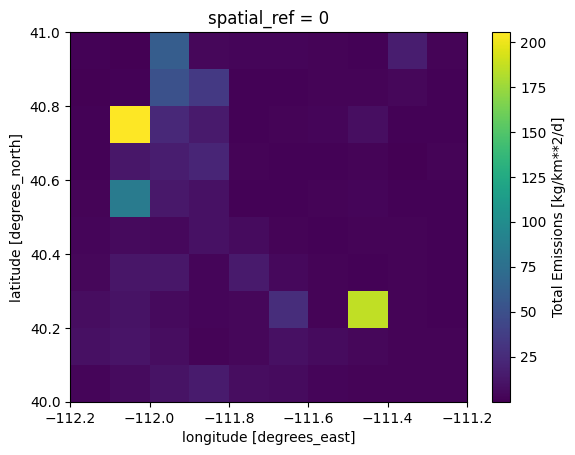

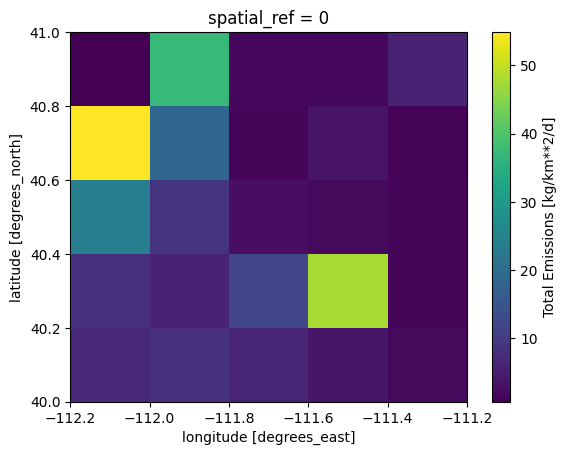

In [2]:

import matplotlib.pyplot as plt
from lair.air import inventories

plt.figure()
i = inventories.EPAv2()
i.clip([-112.2, 40.05, -111.2, 41], crs=4326)
data = i.total_emissions.mean('time')
integrated = i.integrate().isel(time=-1)
data.plot()
print(f'Original Dimensions: lat={data.lat.size}, lon={data.lon.size}')
print(f'Original Total = {float(integrated)}')


plt.figure()
i.resample(0.2)
resampled = i.total_emissions.mean('time')
integrated = i.integrate().isel(time=-1)
resampled.plot()
print(f'Resampled Dimensions: lat={resampled.lat.size}, lon={resampled.lon.size}')
print(f'Resampled Total = {float(integrated)}')

In [9]:
i._scale_by_month(i._data).time

<xarray.DataArray 'time' (time: 84)> Size: 672B
array(['2012-01-01T00:00:00.000000000', '2012-02-01T00:00:00.000000000',
       '2012-03-01T00:00:00.000000000', '2012-04-01T00:00:00.000000000',
       '2012-05-01T00:00:00.000000000', '2012-06-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2012-08-01T00:00:00.000000000',
       '2012-09-01T00:00:00.000000000', '2012-10-01T00:00:00.000000000',
       '2012-11-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2013-02-01T00:00:00.000000000',
       '2013-03-01T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
       '2013-05-01T00:00:00.000000000', '2013-06-01T00:00:00.000000000',
       '2013-07-01T00:00:00.000000000', '2013-08-01T00:00:00.000000000',
       '2013-09-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2013-11-01T00:00:00.000000000', '2013-12-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2014-02-01T00:00:00.000000000',
       '2014-03-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-05-01T00:00:00.000000000', '2014-06-01T00:00:00.000000000',
       '2014-07-01T00:00:00.000000000', '2014-08-01T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000',
       '2014-11-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-05-01T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
       '2015-07-01T00:00:00.000000000', '2015-08-01T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2016-04-01T00:00:00.000000000',
       '2016-05-01T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-09-01T00:00:00.000000000', '2016-10-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-05-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-09-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time         (time) datetime64[ns] 672B 2012-01-01 2012-02-01 ... 2018-12-01
    spatial_ref  int64 8B 0
Attributes:
    long_name:  time
    axis:       T